# MA124 Maths by Computer: Assignment 1

Student number: 2103654

---


In [1]:
# Import standard libraries

import numpy as np
import matplotlib.pyplot as plt

---

## A. Taylor series approximations

One can approximate $\sin(x)$ using a finite number of terms of a Taylor series:

$$
\sin(x) \simeq \sum_{n=0}^N (-1)^n\frac{x^{2n+1}}{(2n+1)!} 
$$

One can also approximate the natural logarithm $\ln(1+x)$ using a finite number of terms of a Taylor series:

$$
\log(1+x) \simeq \sum_{n=1}^N (-1)^{n+1} \frac{x^n}{n}
$$

In this notebook we will explore these approximations, in particular how they depend on $N$. 





In [2]:
# Functions to compute Taylor series approximations for sine and logarithm
# approx for sine
def est_sin(x,N):
    total =0*x
    for n in range (N+1):
        total =total+(-1)**n*(x**(2*n+1))/np.math.factorial(2*n+1)
    return total


# approx for logarithm
def est_ln(x,N):
    y=0*x
    for i in range(1,N):
        y= y+((-1)**(i+1))*(x**i)/i
    return y

---

The figure below shows the Taylor series approximation for sine vs its true plot, with values N from 0 to 7.

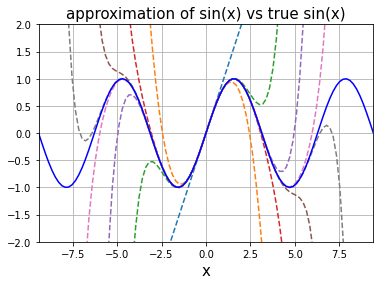

In [3]:
# Before I plot, I set the value for N, note there will be N+1 terms in the approximation
# I also set the range of x
N=7
x = np.linspace(-3*np.pi,3*np.pi,101)

#compute the approximation for all x simultaneously
for N in range (N+1):
    total = est_sin(x,N)
    
    # plot approximation curves of sin (I've made these dotted)        
    plt.plot(x,total,'--', label="approx")

# generate exact sin x
a=np.sin(x)

#plot exact sin x, (I've made it blue and solid)
plt.plot(x,a,'b',label="true")

# making it pretty!
plt.xlim(-3*np.pi,3*np.pi)
plt.ylim(-2, 2)

plt.title("approximation of sin(x) vs true sin(x)", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.grid()

---

The figure below shows the Taylor approximation for logarithm compared to its true plot for N from 0 to 5.

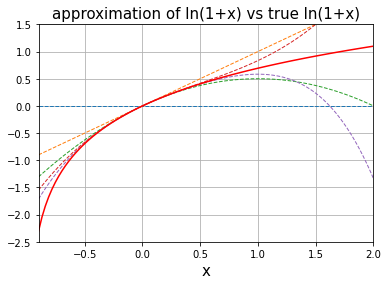

In [4]:
# before I plot, I set the value for N, noting there will be N terms in the approximation
# and set the range of x
N = 6
x = np.linspace(-0.9,2,101)

#compute the approximation for all x simultaneously
for N in range(1,N):
    y = est_ln(x,N)

   # plot approximation curves of ln (I've made these dotted)        
    plt.plot(x,y,'--', label="approx", lw=1)

# generate exact ln
a=np.log(1+x)

#plot exact ln, (I've made it red and solid)
plt.plot(x,a,'r',label="true")

# making it pretty!
plt.xlim(-0.9,2)
plt.ylim(-2.5, 1.5)

plt.title("approximation of ln(1+x) vs true ln(1+x)", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.grid()

#### Challenge section (worth 4 of the 12 marks)

Attempt this only after you have completed all other tasks.

Write Python code to make two plots showing the error in the Taylor series approximation to $\sin(x)$. The plots are as follows:

- Plot the absolute error $|\sin(x) - f_N(x)|$ as a function of $x$ for $x \in [-3\pi, 3\pi]$, where $f_N(x)$ is the series approximation. The plot should contain multiple curves corresponding to the values of $N$ you used above. 

- Produce a [log-log plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) of the absolute error $|\sin(x) - f_N(x)|$ as a function of $x$ for $x \in [0.2, 2\pi]$ for $N=0,1,2,3$. 

- Briefly interpret the two plots, especially the log-log plot. ---

### Error plots (Challenge section)

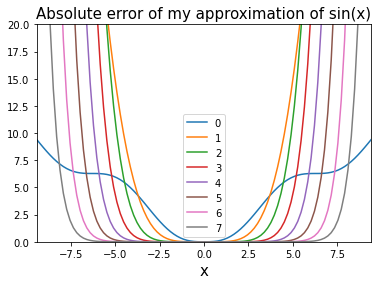

In [5]:
# Function to compute the absolute error in the Taylor series approximations to sin(x)

# defining the range for x
x = np.linspace(-3*np.pi,3*np.pi,101)

# defining my function that I will plot to show the absolute error
def b(x,N):
    error=np.abs(np.sin(x)-est_sin(x,n))
    
    return error
#compute the absolute error for all n simultaneously
for n in range(0,8):
    # plotting the absolute error
    plt.plot(x,b(x,n),label=n)

# adjusting the x and y axes
plt.xlim(-3*np.pi,3*np.pi)
plt.ylim(0, 20)

plt.title("Absolute error of my approximation of sin(x)", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.legend()
plt.show()

The absolute error is very close to zero (i.e. a good approximation) for values closest to x=0 e.g. see for N=1, the orange curve has error extremely close to zero in the range rougly -1<x<1. For x values further away from zero, the absolute error increases exponentially. As we increase the value of N, the approximation is more accurate (has error close to zero) for a larger range of values (since the 'flat' part of the curve spans for a larger range with bigger N). The curves are symmetric about the y-axis.

N=0 doesn't quite fit the trend though, it flucuates.

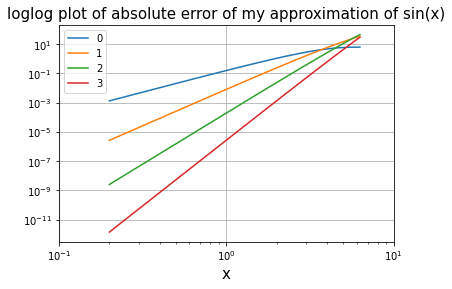

In [6]:
# producing a loglog plot

# setting the range of x values as instructed
x = np.linspace(0.2,2*np.pi,101)
for n in range(0,4):
    plt.loglog(x,b(x,n),label=n)

#adjusting the x axis
plt.xlim(10**-1,10)

# adding details 
plt.title("loglog plot of absolute error of my approximation of sin(x)", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.legend()
plt.grid(True) #I've chosen to include the grid!

### Comparing error across x values: ###

For smaller values of x, the absolute error is smaller (see how the curves slope upwards, indicating as x increases, absolute error increases too).

### Comparing the different values of N: ###

The error is smaller for larger N (see how the red line, N=3, is below all other lines indicating it has the smallest absolute value). This holds for x up until about $10^{0.5}$\ then the difference between absolute error values differs less between N and N=0 gives the smallest absolute error.

---
## B. Parametric roller coaster

Here we present an original design for a parametric roller coaster. 

### Parametrisation for the sections of my rollercoaster

*Section 1: The Calm*

$x_1$(t)=2tcos(t), $y_1$(t)=2sin(t), $z_1$(t)=2t , t∈[0,$\pi$]

*Section 2: The Drop*

$x_2$(t)=-2$\pi$cos(2t), $y_2$(t)=-2sin(2t), $z_2$(t)=2$\pi$cos(2t), t∈[0,$\pi/8$]

*Section 3: Dizzy Doom*

$x_3$(t)=-$2^{0.5}\pi$t, $y_3$(t)=$-2^{0.5}\pi$sin(2t), $z_3$(t)=cos(2t)+$2^{0.5}\pi-1$, t∈[0,$2\pi$]

*Section 4: Recovery*

$x_4$(t)=$2-2^{0.5}\pi$(1-t), $y_4$(t)=$-2^{0.5}$(1-t), $z_4$(t)=$2^{0.5}\pi$(1-t), t∈[0,1]

The first coordinate of section 1 is ( 0.0 , 0.0 , 0.0 )
The last coordinate of section 1 is ( -6.283185307179586 , 2.4492935982947064e-16 , 6.283185307179586 )
The first coordinate of section 2 is ( -6.283185307179586 , -0.0 , 6.283185307179586 )
The last coordinate of section 2 is ( -4.442882938158366 , -1.4142135623730951 , 4.442882938158366 )
The first coordinate of section 3 is ( -4.442882938158366 , -1.4142135623730951 , 4.442882938158366 )
The last coordinate of section 3 is ( 1.8403023690212201 , -1.4142135623730956 , 4.442882938158366 )
The first coordinate of section 4 is ( 1.84030236902122 , -1.4142135623730951 , 4.442882938158366 )
The last coordinate of section 4 is ( 0.0 , -0.0 , 0.0 )


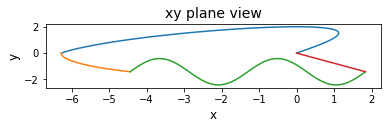

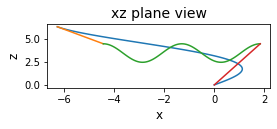

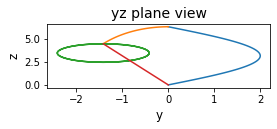

<Figure size 288x288 with 0 Axes>

In [7]:
# section 1
t1 = np.linspace(0,np.pi,101)
x1 = t1 * 2 * np.cos(t1)
y1 = 2 * np.sin(t1)
z1 = 2 * t1

print("The first coordinate of section 1 is (", x1[0], ",",y1[0], ",", z1[0], ")")
print("The last coordinate of section 1 is (", x1[-1], ",",y1[-1], ",", z1[-1], ")")

# section 2
t2 = np.linspace(0,0.125*np.pi,101)
x2 = np.pi*-2*np.cos(2*t2)
y2 = -2*np.sin(2*t2)
z2 = np.pi*2*np.cos(2*t2)

print("The first coordinate of section 2 is (", x2[0], ",",y2[0], ",", z2[0], ")")
print("The last coordinate of section 2 is (", x2[-1], ",",y2[-1], ",", z2[-1], ")")

# section 3
t3 = np.linspace(0,2*np.pi,101)
x3 = t3+(-np.pi)*2**0.5
y3 = np.sin(2*t3)-2**0.5
z3 = np.cos(2*t3)+(np.pi*2**0.5-1)

print("The first coordinate of section 3 is (", x3[0], ",",y3[0], ",", z3[0], ")")
print("The last coordinate of section 3 is (", x3[100], ",",y3[-1], ",", z3[-1], ")")

# section 4
t4 = np.linspace(0,1,101)
x4 = (2-2**0.5)*np.pi*(1-t4) 
y4 = -2**0.5*(1-t4)
z4 = np.pi*2**0.5*(1-t4)

print("The first coordinate of section 4 is (", x4[0], ",",y4[0], ",", z4[0], ")")
print("The last coordinate of section 4 is (", x4[-1], ",",y4[-1], ",", z4[-1], ")")

# plotting subplots
plt.subplot(311)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('xy plane view', fontsize=14)
plt.figure(figsize=(4,4))

plt.subplot(312)
plt.plot(x1,z1)
plt.plot(x2,z2)
plt.plot(x3,z3)
plt.plot(x4,z4)

plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)
plt.title('xz plane view', fontsize=14)
plt.figure(figsize=(4,4))

plt.subplot(313)
plt.plot(y1,z1)
plt.plot(y2,z2)
plt.plot(y3,z3)
plt.plot(y4,z4)

plt.xlabel('y', fontsize=12)
plt.ylabel('z', fontsize=12)
plt.title('yz plane view', fontsize=14)
plt.figure(figsize=(4,4))
plt.show()

### Description: 


My rollercoaster has 4 sections. It starts gentle (blue section) to ease your mind but before you know it, you're faced with a drop (yellow) only to be followed by a corkscrew (green). After enduring all that, you return back to where you started (red) on a nice straight piece of track! Hope you come again!

I know the 2D plots might look like the curves intersect each other at some points but they don't!!

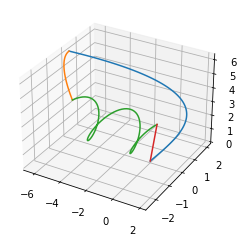

In [8]:
#t=np.linspace(0,2*np.pi)
#plt.plot(np.cos(t),np.sin(t))
#ax=plt.axes(projection='3d')
#ax.plot(np.cos(t),np.sin(t),t)

t1 = np.linspace(0,np.pi,101)
x1 = t1 * 2 * np.cos(t1)
y1 = 2 * np.sin(t1)
z1 = 2 * t1

t2 = np.linspace(0,0.125*np.pi,101)
x2 = np.pi*-2*np.cos(2*t2)
y2 = -2*np.sin(2*t2)
z2 = np.pi*2*np.cos(2*t2)

t3 = np.linspace(0,2*np.pi,101)
x3 = t3+(-np.pi)*2**0.5
y3 = np.sin(2*t3)-2**0.5
z3 = np.cos(2*t3)+(np.pi*2**0.5-1)

t4 = np.linspace(0,1,101)
x4 = (2-2**0.5)*np.pi*(1-t4) 
y4 = -2**0.5*(1-t4)
z4 = np.pi*2**0.5*(1-t4)

ax=plt.axes(projection='3d')
ax.plot(x1,y1,z1)
ax.plot(x2,y2,z2)
ax.plot(x3,y3,z3)
ax.plot(x4,y4,z4)

plt.show()